In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, MaxPool2D
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import *

In [ ]:
len(tf.config.list_physical_devices('GPU'))

In [11]:
path=r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume_seg\Train'

In [18]:
for index, name in enumerate(os.listdir(path)):
    folder = os.path.join(path, name)
    print(folder)
    for file_class in os.listdir(folder):
        if 'patches' in file_class:
            print(index,file_class,file_class)
        

C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume_seg\Train\00_5
0 161885_patches 161885_patches
0 171969_patches 171969_patches
0 187107_patches 187107_patches
0 Study_84977_patches Study_84977_patches
0 Study_86151_patches Study_86151_patches
0 Study_86905_patches Study_86905_patches
0 Study_87594_patches Study_87594_patches
0 Study_88854_patches Study_88854_patches
0 Study_88946_patches Study_88946_patches
0 Study_90933_patches Study_90933_patches
0 Study_90938_patches Study_90938_patches
0 Study_90954_patches Study_90954_patches
0 Study_91407_patches Study_91407_patches
0 Study_91525_patches Study_91525_patches
0 Study_92214_patches Study_92214_patches
0 Study_92656_patches Study_92656_patches
0 Study_92925_patches Study_92925_patches
0 Study_93092_patches Study_93092_patches
0 Study_93682_patches Study_93682_patches
0 Study_94095_patches Study_94095_patches
0 Study_96033_patches Study_96033_patches
0 Study_96762_patches Study_96762_patches
0 Study_96828_patches Study_9682

In [ ]:
def import_maps(path):
    images = []
    for index, name in enumerate(os.listdir(path)):
        folder = os.path.join(path, name)
        for file_class in os.listdir(folder):
            if 'patches' in file_class:
                im_folder = os.path.join(folder, file_class)
#                 print(im_folder)
#                 break
                for im in os.listdir(im_folder):
                    img = cv2.imread(os.path.join(im_folder, im))
                    #print(img.shape)
                    if img is not None:
                        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                        img1 = cv2.resize(img, (112, 112))
                        img = np.dstack((img1,img1,img1))
                    if img is not None:
                   #     img = (img-np.mean(img))/np.std(img)
                        images.append((np.array(img), index)) 
    return images

In [ ]:
image_train_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume_seg\Train')
image_test_set = import_maps(r'C:\Users\AIIMS-IITD\Desktop\Sanjeev\4_class_cluster_volume_seg\Test')

In [ ]:
train_images_all = [i[0] for i in image_train_set]
train_images_array = np.array(train_images_all)
#train_images_array=np.expand_dims(train_images_array,axis=3)
train_image_label = [i[1] for i in image_train_set]
train_image_label = np.array(train_image_label)

In [ ]:
test_images_all = [i[0] for i in image_test_set]
test_images_array = np.array(test_images_all)
#test_images_array=np.expand_dims(test_images_array,axis=3)
test_image_label = [i[1] for i in image_test_set]
test_image_label = np.array(test_image_label)

In [ ]:
test_images_array.shape

In [ ]:
scalar = StandardScaler(copy=False)
train_images = scalar.fit_transform(train_images_array.reshape(len(train_images_array), 112*112*3))
train_images_array = train_images.reshape(len(train_images_array), 112,112, 3)

In [ ]:
test_image = scalar.fit_transform(test_images_array.reshape(len(test_images_array),112*112*3))
test_image_array = test_image.reshape(len(test_images_array),112,112,3)

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
train_label_enc = enc.fit_transform(train_image_label.reshape(-1, 1)).toarray()
#val_label_enc = enc.fit_transform(val_y.reshape(-1, 1)).toarray()
test_label_enc = enc.fit_transform(test_image_label.reshape(-1, 1)).toarray()

In [ ]:
from keras.applications.vgg16 import VGG16


In [ ]:
model = VGG16()
print(model.summary())

In [35]:
from keras.layers import Flatten,Dropout,Dense,Activation,Input
from keras.models import Model
new_input = Input(shape=(224, 224, 1))
model1 = VGG16(include_top = False, input_shape=(112,112,3))
layer = model1.get_layer('block5_pool').output
x = Flatten()(layer)
x = Dropout(0.5)(x)
x = Dense(256,activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.25)(x)
x = Dense(128,activation = 'relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4))(x)
x = Dropout(0.25)(x)
out = Dense(4,activation = 'softmax')(x)
model = Model(model1.input,out)

In [36]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer = keras.optimizers.SGD(0.001),metrics=['accuracy','AUC'])

In [38]:
history = model.fit(train_images_array,train_label_enc,validation_data=(test_images_array,test_label_enc), batch_size=32, epochs=20, verbose=1,shuffle=True)

Epoch 1/20
239/239 [==============================] - 53s 85ms/step - loss: 1.3391 - accuracy: 0.3646 - auc: 0.6446 - val_loss: 4.5788 - val_accuracy: 0.3270 - val_auc: 0.6155ss: 1.3793 - accura - ETA: 3s - loss: 1.3713 - accuracy: 0.3461 - - ETA: 3s - loss: 1.365 - ETA:  - ETA: 0s - loss: 1.3413 - accuracy: 0.3630 - a
Epoch 2/20
239/239 [==============================] - 17s 72ms/step - loss: 1.1156 - accuracy: 0.4918 - auc: 0.7707 - val_loss: 7.4834 - val_accuracy: 0.3847 - val_auc: 0.6185 1.2103 - ac - ETA: 12s - loss: 1.2091 - accuracy: 0.4192 -  - ETA: 12s - loss: 1.2022 - accuracy: 0 - ETA: 8s - loss: 1.1738  - ETA: 7s - loss: 1.164 - ETA: 6s - loss: 1.1554 - accuracy: 0.4650 - auc - ETA: 5s - loss: 1.1536 - accuracy: 0.4667 - auc:  - ETA - ETA: 3s - loss: 1.139 - ETA: 0s - loss: 1.1184 - accuracy: 0.
Epoch 3/20
239/239 [==============================] - 17s 71ms/step - loss: 0.8826 - accuracy: 0.6370 - auc: 0.8650 - val_loss: 12.4267 - val_accuracy: 0.3649 - val_auc: 0.5980- ETA

In [42]:
score = model.evaluate(test_image_array,test_label_enc, batch_size=32)

35/35 [==============================] - 1s 22ms/step - loss: 4.2402 - accuracy: 0.3937 - auc: 0.6464 0s - loss: 4.7939 - accuracy: 0.4453 - a - ETA: 0s - loss: 4.3260 - accuracy: 0.3814 - auc: 0.63


In [39]:
y_predict = model.predict(test_image_array)

In [40]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [41]:
confusion_matrix(test_image_label,y_predict_bool)

array([[219,  30,  40,  80],
       [ 67,   1,  28,  53],
       [ 20,   4, 120, 120],
       [ 12, 109, 110,  97]], dtype=int64)

In [43]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64       369
           1       0.01      0.01      0.01       149
           2       0.40      0.45      0.43       264
           3       0.28      0.30      0.29       328

    accuracy                           0.39      1110
   macro avg       0.34      0.34      0.34      1110
weighted avg       0.41      0.39      0.40      1110



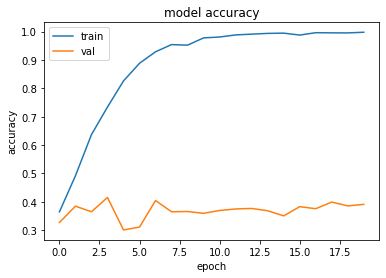

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

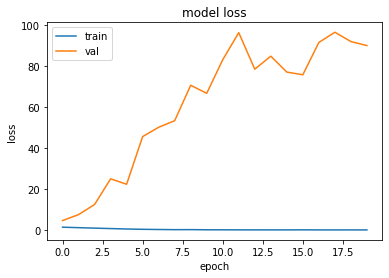

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

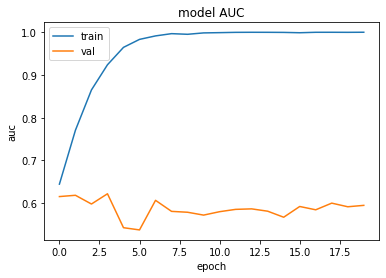

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model AUC')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
score = model.evaluate(test_image_array[0:369],test_label_enc[0:369], batch_size=32)

12/12 [==============================] - 1s 82ms/step - loss: 3.0620 - accuracy: 0.5935 - auc: 0.7480


In [53]:
score = model.evaluate(test_image_array[369:518],test_label_enc[369:518], batch_size=32)

5/5 [==============================] - 1s 190ms/step - loss: 11.4179 - accuracy: 0.0067 - auc: 0.2539


In [55]:
score = model.evaluate(test_image_array[518:782],test_label_enc[518:782], batch_size=32)

9/9 [==============================] - 1s 70ms/step - loss: 2.9157 - accuracy: 0.4545 - auc: 0.7163


In [54]:
518+264

782

# MobileNetV2

In [56]:
from keras.applications.mobilenet_v2 import MobileNetV2
model = MobileNetV2()

14548992/14536120 [==============================] - 3s 0us/step


In [57]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [64]:
from keras.layers import Flatten,Dropout,Dense,Activation,Input
from keras.models import Model
new_input = Input(shape=(224, 224, 1))
model1 = MobileNetV2(include_top = False, input_shape=(112,112,3))
layer = model1.get_layer('out_relu').output
x = Flatten()(layer)
x = Dropout(0.5)(x)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.25)(x)
out = Dense(4,activation = 'softmax')(x)
model = Model(model1.input,out)

In [65]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 112, 112, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 56, 56, 32)   864         input_8[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 56, 56, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 56, 56, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [66]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer = keras.optimizers.SGD(0.001),metrics=['accuracy','AUC'])

In [67]:
history = model.fit(train_images_array,train_label_enc,validation_data=(test_images_array,test_label_enc), batch_size=32, epochs=20, verbose=1,shuffle=True)

Epoch 1/20
239/239 [==============================] - 14s 52ms/step - loss: 1.4208 - accuracy: 0.4410 - auc: 0.7015 - val_loss: 2.1984 - val_accuracy: 0.2595 - val_auc: 0.5303 los - ETA: 4s - loss: 1.5777 - accuracy:  - ETA: 3s - loss: 1.5438  - ETA: 2s - loss: 1.5047 - accuracy: 0.4182 -
Epoch 2/20
239/239 [==============================] - 12s 49ms/step - loss: 0.8517 - accuracy: 0.6545 - auc: 0.8745 - val_loss: 1.8623 - val_accuracy: 0.2703 - val_auc: 0.5706- loss: 1.0572 - accuracy: 0.56 - ETA: 9s - loss: 1.0250 - accuracy: 0.5781 - auc - ETA: 9s - loss: 1.0272 - accuracy: 0.57 - ETA: 8s - loss: - ETA: 7s - loss: 0.9660 - accuracy: 0.61 - ETA: 6s - loss: 0.9538 - accuracy: 0.6124 - - ETA: 6s - loss: 0.9452 - accuracy: 0.6160 - auc:  - ETA: 5s - loss: 0.9361 - accuracy:  - ETA: 5s - ETA: 3s - loss: 0.8947 - accuracy: 0.63 - ETA: 2s - loss: 0.8910 - accu - ETA: 1s - loss: 0.8733 - accuracy: 0.6454 - auc: 0. - ETA: 1s - loss: 0.8701 - accuracy: 0.6476 - auc:  - ETA: 1s - loss: - ETA: 

In [68]:
score = model.evaluate(test_image_array,test_label_enc, batch_size=32)

35/35 [==============================] - 1s 16ms/step - loss: 4.8260 - accuracy: 0.3459 - auc: 0.5822 0s - loss: 5.7552 - accuracy: 0.3034 - auc: 0.53 - ETA: 0s - loss: 5.2966 - accuracy: 0.3380 - auc: 


In [69]:
y_predict = model.predict(test_image_array)

In [70]:
y_predict_bool = np.argmax(y_predict,axis=1).tolist()

In [71]:
confusion_matrix(test_image_label,y_predict_bool)

array([[121,  29, 130,  89],
       [ 67,   0,  12,  70],
       [ 17,   2, 126, 119],
       [ 18,  50, 123, 137]], dtype=int64)

In [72]:
print(classification_report(test_image_label,y_predict_bool))

              precision    recall  f1-score   support

           0       0.54      0.33      0.41       369
           1       0.00      0.00      0.00       149
           2       0.32      0.48      0.38       264
           3       0.33      0.42      0.37       328

    accuracy                           0.35      1110
   macro avg       0.30      0.31      0.29      1110
weighted avg       0.35      0.35      0.34      1110

